In [1]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Dropout,BatchNormalization,Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os

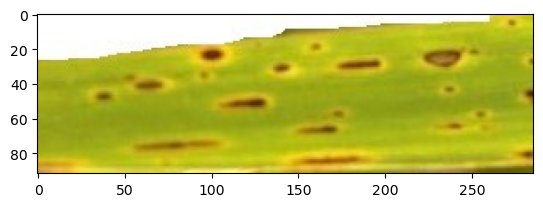

In [2]:
img=image.load_img('C:\\AI(ml&dl)\\DATASETS\\Rice_Leaf_Disease\\Rice_pred\\DSC_0115.jpg')
plt.imshow(img)



In [3]:
img=cv2.imread("C:\\AI(ml&dl)\\DATASETS\\Rice_Leaf_Disease\\Rice_pred\\DSC_0115.jpg")
img.shape

(92, 286, 3)

In [4]:
train=ImageDataGenerator(rescale=None,
                        shear_range=0.2,
                        zoom_range=0.2,
                        horizontal_flip=True)
val=ImageDataGenerator(rescale=1/255)

train_set=train.flow_from_directory('C:\\AI(ml&dl)\\DATASETS\\Rice_Leaf_Disease\\Rice_Train',
                                    target_size=(128,128),
                                    batch_size=8,
                                    class_mode='categorical'
                                   )

val_set=train.flow_from_directory('C:\\AI(ml&dl)\\DATASETS\\Rice_Leaf_Disease\\rice_val',
                                    target_size=(128,128),
                                    batch_size=8,
                                    class_mode='categorical'
                                   )


label1=print(train_set.class_indices)
label2=print(val_set.class_indices)

Found 120 images belonging to 3 classes.
Found 120 images belonging to 3 classes.
{'Bacterial leaf blight': 0, 'Brown spot': 1, 'Leaf smut': 2}
{'Bacterial leaf blight': 0, 'Brown spot': 1, 'Leaf smut': 2}


In [5]:
model=Sequential()
model.add(Conv2D(16,(3,3),activation='relu',input_shape=(128,128,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [6]:
history=model.fit(train_set,
      epochs=50,
      validation_data=val_set)

Epoch 1/50
15/15 [==============================] - 18s 1s/step - loss: 38.8296 - accuracy: 0.3750 - val_loss: 2.1424 - val_accuracy: 0.4583
Epoch 2/50
15/15 [==============================] - 16s 1s/step - loss: 1.2313 - accuracy: 0.5000 - val_loss: 1.4073 - val_accuracy: 0.4083
Epoch 3/50
15/15 [==============================] - 16s 1s/step - loss: 0.9451 - accuracy: 0.5667 - val_loss: 0.7178 - val_accuracy: 0.7250
Epoch 4/50
15/15 [==============================] - 15s 1s/step - loss: 0.7003 - accuracy: 0.7167 - val_loss: 0.5480 - val_accuracy: 0.7417
Epoch 5/50
15/15 [==============================] - 15s 1s/step - loss: 0.9054 - accuracy: 0.5917 - val_loss: 0.8566 - val_accuracy: 0.6000
Epoch 6/50
15/15 [==============================] - 16s 1s/step - loss: 1.0061 - accuracy: 0.5417 - val_loss: 0.7922 - val_accuracy: 0.6417
Epoch 7/50
15/15 [==============================] - 15s 1s/step - loss: 0.8062 - accuracy: 0.6417 - val_loss: 0.7112 - val_accuracy: 0.6750
Epoch 8/50
15/15 [=

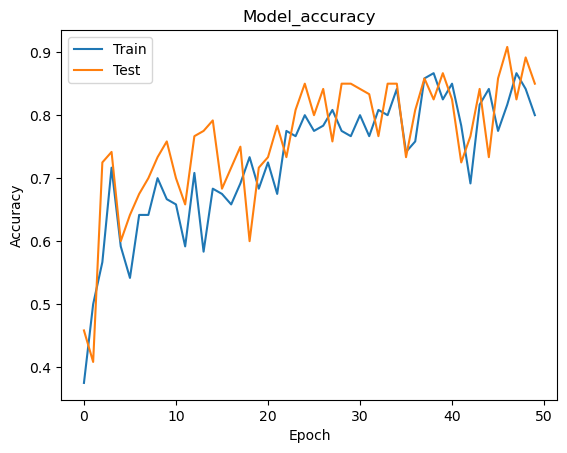

In [7]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model_accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Test'],loc='upper left')
plt.show()

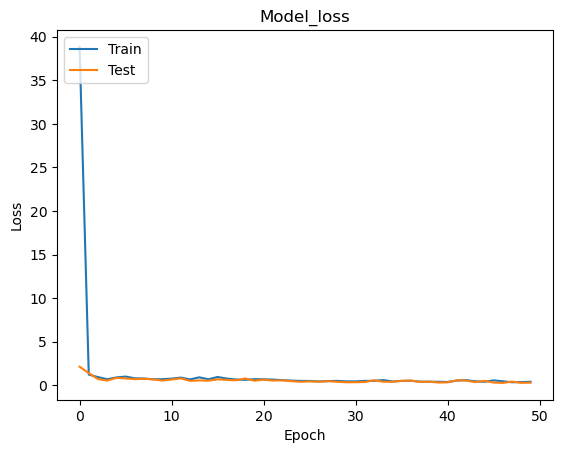

In [8]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model_loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Test'],loc='upper left')
plt.show()

In [9]:
labelR=['Bacterial leaf blight', 'Brown spot', 'Leaf smut',
'Bacterial leaf blight', 'Brown spot', 'Leaf smut']

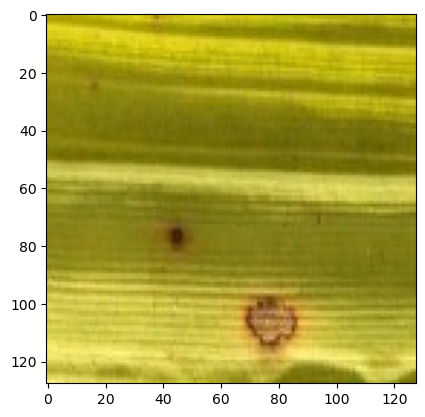

1/1 [==============================] - 0s 48ms/step
[[1.04296562e-23 1.00000000e+00 1.24696715e-08]]
1.0
1
Brown spot


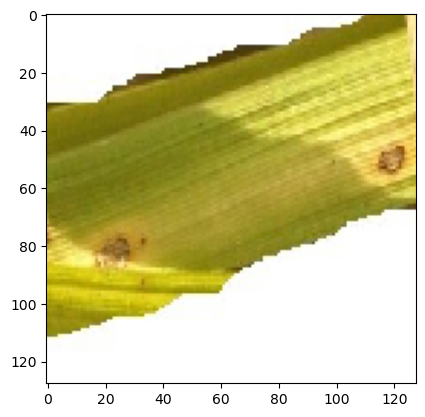

1/1 [==============================] - 0s 34ms/step
[[1.3660041e-09 9.9430650e-01 5.6935251e-03]]
0.9943065
1
Brown spot


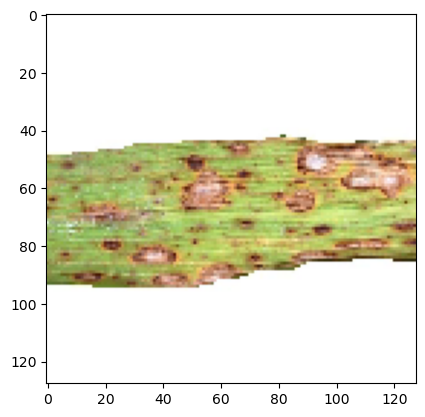

1/1 [==============================] - 0s 51ms/step
[[0.07807975 0.3764563  0.545464  ]]
0.545464
2
Leaf smut


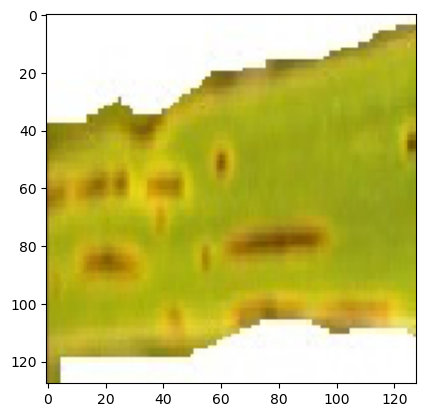

1/1 [==============================] - 0s 52ms/step
[[2.6426016e-05 9.9984646e-01 1.2701254e-04]]
0.99984646
1
Brown spot


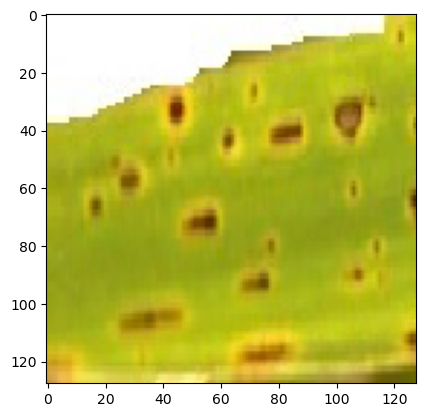

1/1 [==============================] - 0s 47ms/step
[[1.1565131e-11 9.9927431e-01 7.2567031e-04]]
0.9992743
1
Brown spot


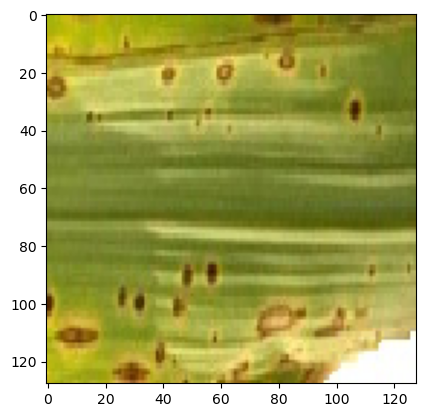

1/1 [==============================] - 0s 34ms/step
[[5.5655414e-06 9.9633300e-01 3.6613946e-03]]
0.996333
1
Brown spot


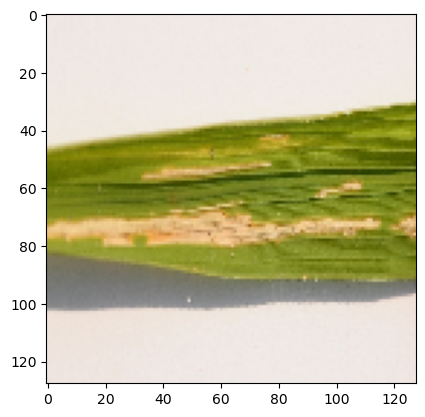

1/1 [==============================] - 0s 33ms/step
[[9.9994051e-01 5.4244112e-05 5.2007667e-06]]
0.9999405
0
Bacterial leaf blight


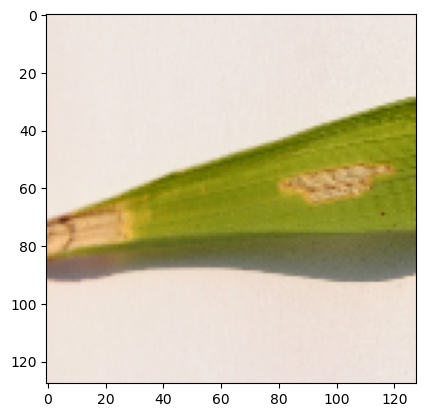

1/1 [==============================] - 0s 35ms/step
[[9.9236286e-01 7.6233447e-03 1.3836153e-05]]
0.99236286
0
Bacterial leaf blight


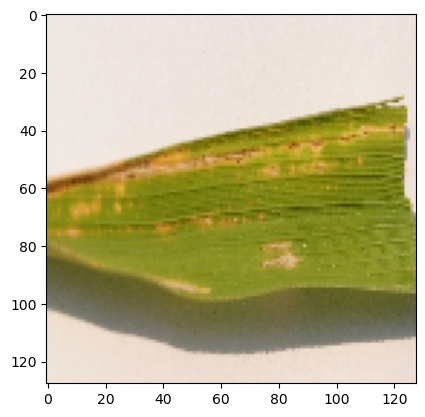

1/1 [==============================] - 0s 50ms/step
[[9.9657673e-01 3.3081304e-03 1.1510348e-04]]
0.9965767
0
Bacterial leaf blight


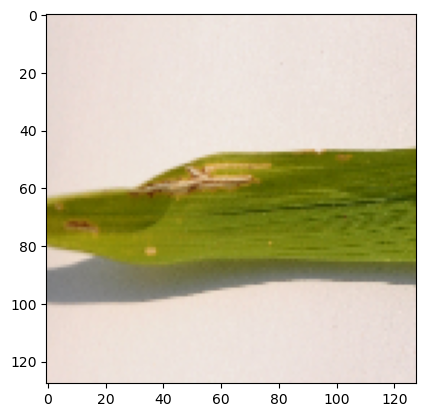

1/1 [==============================] - 0s 34ms/step
[[9.9916649e-01 3.9544713e-04 4.3803372e-04]]
0.9991665
0
Bacterial leaf blight


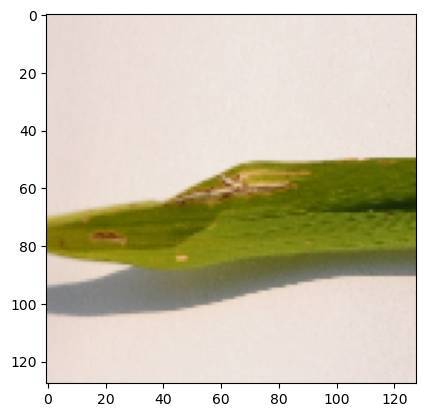

1/1 [==============================] - 0s 49ms/step
[[9.9974495e-01 3.9707567e-05 2.1541155e-04]]
0.99974495
0
Bacterial leaf blight


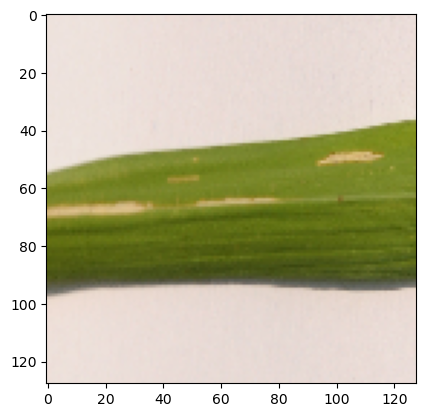

1/1 [==============================] - 0s 34ms/step
[[9.834742e-01 7.782394e-06 1.651803e-02]]
0.9834742
0
Bacterial leaf blight


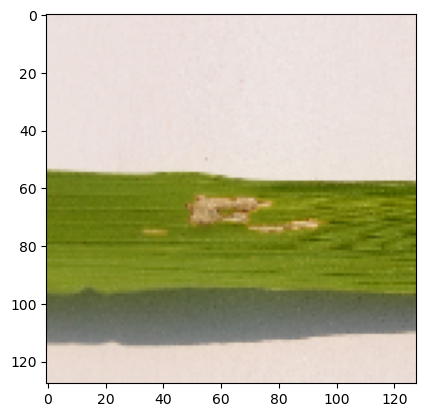

1/1 [==============================] - 0s 47ms/step
[[1.0000000e+00 1.8385620e-08 1.4728812e-11]]
1.0
0
Bacterial leaf blight


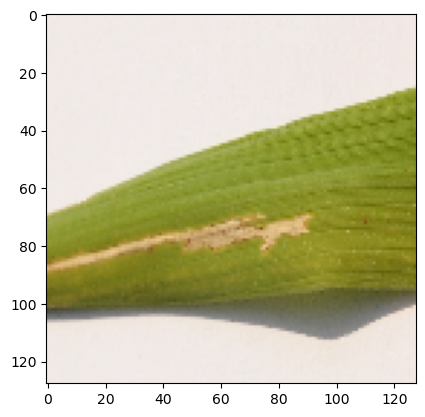

1/1 [==============================] - 0s 48ms/step
[[9.9796778e-01 1.8535556e-03 1.7863821e-04]]
0.9979678
0
Bacterial leaf blight


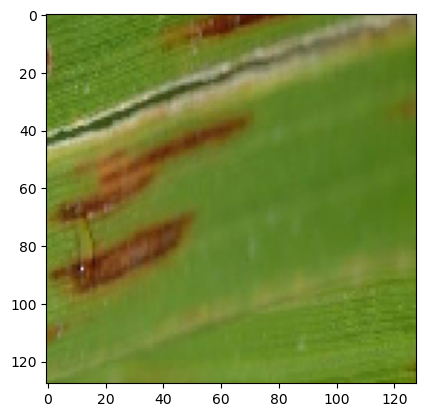

1/1 [==============================] - 0s 36ms/step
[[0.00117079 0.1880919  0.8107373 ]]
0.8107373
2
Leaf smut


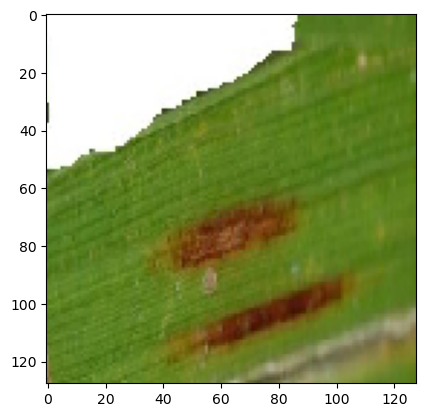

1/1 [==============================] - 0s 51ms/step
[[1.3772039e-10 6.1397091e-05 9.9993861e-01]]
0.9999386
2
Leaf smut


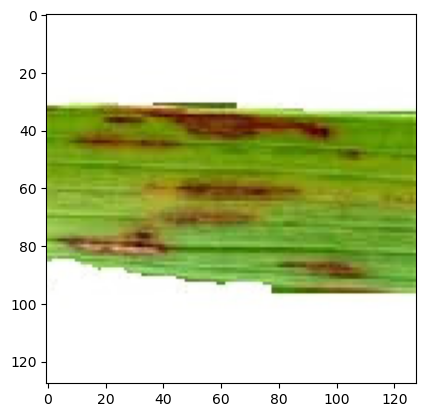

1/1 [==============================] - 0s 40ms/step
[[6.4151332e-04 2.0493284e-02 9.7886527e-01]]
0.97886527
2
Leaf smut


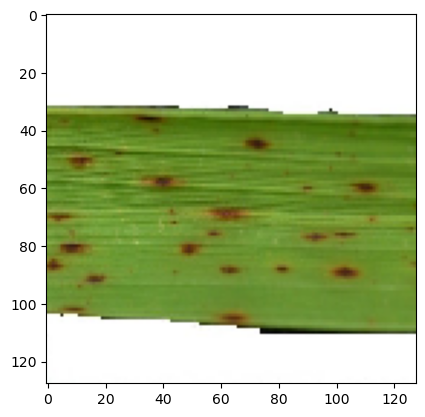

1/1 [==============================] - 0s 50ms/step
[[8.0311875e-11 7.3557649e-06 9.9999261e-01]]
0.9999926
2
Leaf smut


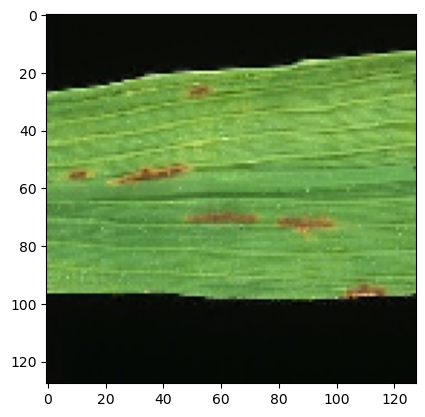

1/1 [==============================] - 0s 50ms/step
[[0.0000000e+00 1.4983321e-33 1.0000000e+00]]
1.0
2
Leaf smut


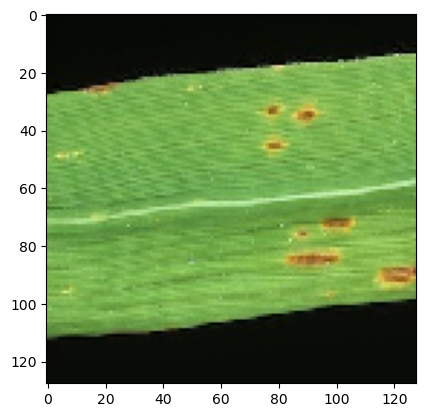

1/1 [==============================] - 0s 55ms/step
[[1.5461148e-30 7.7408522e-24 1.0000000e+00]]
1.0
2
Leaf smut


In [12]:
dir_path="C:\\AI(ml&dl)\\DATASETS\\Rice_Leaf_Disease\\Rice_pred"
for i in os.listdir(dir_path):
    img=image.load_img(dir_path+'//'+i,target_size=(128,128))
    plt.imshow(img)
    plt.show()
    
    x=image.img_to_array(img)
    x=np.expand_dims(x,axis=0)
    
    images=np.vstack([x])
    result=model.predict(images)
    print(result)
    fresult=np.max(result)
    print(fresult)
    label=labelR[result.argmax()]
    print(result.argmax())
    print(label)
    